# __SHOPIFY Challenge: Data Science Intern__
________

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.5+ KB


In [3]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [4]:
data.order_amount.sum() / 5000

3145.128

# __A. Better Way to Evaluate the Data__
## Observation
___
Average Order Value (AOV) tracks the average dollar amount spent each time a customer places an order on a website or mobile app. It can be simply calculated by dividing the total revenue by the number of orders.

\begin{equation}
AverageOrderValue (AOV) = \frac{Revenue}{Number of Orders}
\end{equation}

___
* The AOV has been calculated naively, and I suspect that the underlying problem may be due to outliers.
* I will create another feature `item_price` by dividing the `order_amount` by `total_items`.

In [5]:
data['item_price'] = data['order_amount'] / data['total_items']

In [6]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


In [7]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


From the table above, the columns `order_amount`, `total_items`, `item_price` need to be investigated for __outliers__. This is in consideration with the fact that the range between the *75th percentile* and the *max* value is extremely large.
___
In the next cells, I'll plot a boxplot in a bid to visualize the outliers.

Text(0.5, 1.0, 'Total Items')

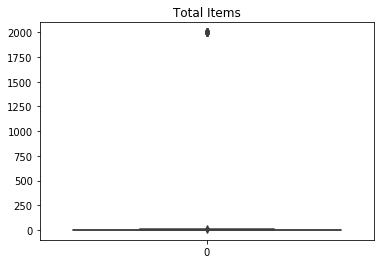

In [8]:
sns.boxplot(data=data.total_items)
plt.title('Total Items')

Text(0.5, 1.0, 'Item Price')

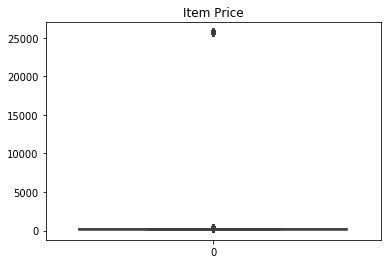

In [9]:
sns.boxplot(data=data.item_price)
plt.title('Item Price')

# __B. Metric Still remains AOV__
## Summary
___
From the box-plots above, it is noticed that there are actually outliers. I'll drill down on these outliers in the following cells. I'm basing my analysis on the following intuitions:
1. It seems very strange that about 2000 items were ordered at once, especially when compared to a vast majority of the other orders which span 1-8 items.
2. It is most unlikely that no pair of sneakers will cost as high as $25000. It's simply outrageous.

There might have been a mistake during the data entry process.

In [10]:
data[data.total_items > 1750]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0


In [11]:
data[data.shop_id == 42].shape

(51, 8)

In [12]:
data[data.item_price > 20000].shape

(46, 8)

In [13]:
data[data.shop_id == 78].shape

(46, 8)

# __C. Value of AOV: $302.58__
## Effect of Removing the Outliers
____
I will remove the outliers in order to make an more realistic analysis which is bereft of noise from the outliers.

In [14]:
def remove_outlier(df):
    df = df[df.total_items < 2000]
    df = df[df.item_price < 20000]
    df = df.reset_index(drop=True)
    
    return df

In [15]:
new_data = remove_outlier(data)

In [16]:
new_aov = new_data.order_amount.sum() / len(new_data)
avg_items_per_order = new_data.total_items.sum() / len(new_data)

print('The new Average Order Value is ${}'.format(round(new_aov, 2)))
print('The Average Items per Order is {} sneakers'.format(round(avg_items_per_order, 1)))

The new Average Order Value is $302.58
The Average Items per Order is 2.0 sneakers


The Average Order Value of $302.58 is more realistic considering that these shops sell an average of 2 sneakers per order.

Text(0.5, 1.0, 'Item Price')

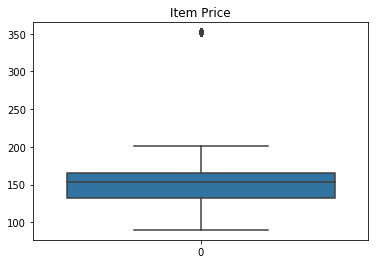

In [17]:
sns.boxplot(data=new_data.item_price)
plt.title('Item Price')

Text(0.5, 1.0, 'Total Items')

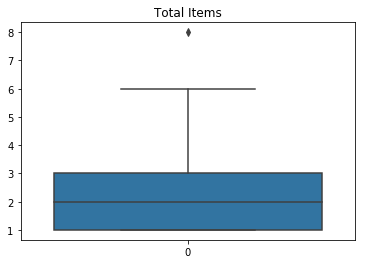

In [18]:
sns.boxplot(data=new_data.total_items)
plt.title('Total Items')

In [19]:
new_data.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


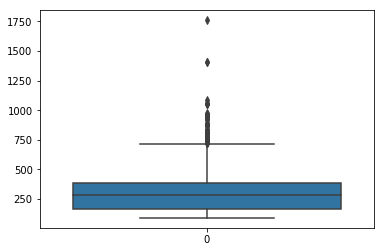

In [20]:
sns.boxplot(data=new_data.order_amount)

In [21]:
data[data.total_items > 10]['shop_id'].unique()

array([42], dtype=int64)

In [22]:
data[data.item_price > 500]['shop_id'].unique()

array([78], dtype=int64)

# __CONCLUSION__
___
The orders at shops with `shop_id` __42__ & __78__ should be investigated to ascertain the root cause of the erroneous values. The